In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from scipy import stats
import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### FUNCTIONS

In [ ]:
#Remove Outliers from a dictionary
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [ ]:
# Index List of Non-Outliers
#nonOutlierList = Remove_Outlier_Indices(dfsv)

Unique Occurence of elements of a strng, where genres or coutnries are divided by comma. It will return a list of 
unique values for genres or countries


In [ ]:
def genres_occurence(x):
    '''This function will take a dictionary Series where values are \
        strings that have multiple unique values separated by comma\
            and will find total occurences sorted revercely'''
    genreslist = []
    genreslist = x['genres'].to_list()
    l=[]
    for element in genreslist:
        l.extend(element.split(','))
    uniquegenres = list(set(l)) 
    d={}
    for g in uniquegenres:
        d[g] = l.count(g)
    return {k: v for k, v in sorted(d.items(), key=lambda z: z[1], reverse = True)}

In [ ]:
def genres_occurence_least(x):
    '''This function will take a dictionary Series where values are \
        strings that have multiple unique values separated by comma \
            and will find all occurences '''
    genreslist = []
    genreslist = x['genres'].to_list()
    l=[]
    for element in genreslist:
        l.extend(element.split(','))
    uniquegenres = list(set(l)) 
    d={}
    for g in uniquegenres:
        d[g] = l.count(g)
    return {k: v for k, v in sorted(d.items(), key=lambda z: z[1])}

In [ ]:
def func_countrynameslist(thedf, year,d):
    '''This fuction will take the dictionary of Netflix, and return a series with all single countries with their occuring counts. It will\
         separate the countries in case of a combination '''
    countrtylist = thedf[thedf['release_year'] == year]['production_countries'].str.split(',', expand = True).stack().reset_index(level=1, drop=True)
    cl = pd.Series(list(map(d.get, countrylist, countrylist)))
    cl.replace('', np.nan, inplace=True)
    cl.dropna(inplace = True)
    return cl

In [ ]:
def plotearth(thedf,year,d):
    '''Function to create an earth plot showing the counts of products prevailing in each country'''
    #d is the dictionary with ISO country codes translated to country names
    #define the dictionary upon which to run the loop
    #thedf = dfnewhigh
    loc = func_countrynameslist(thedf, year,d)
    fig = go.Figure(data=go.Choropleth(locationmode='country names',locations = loc, z = loc.value_counts()\
                                       , reversescale=False, colorbar_title = 'Product Counts'))
    fig.update_layout( title_text='Production Countries for year {}'.format(year),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.5,
        y=0,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
    )
    return fig.show()

### DATA CLEANSING

In [ ]:
#The datafiles from Kaggle https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies
#titles has all information about the Netflix products while credits information about actors and directors
#playing in the movies/Shows.

In [ ]:
dftitles= pd.read_csv('titles.csv', low_memory=False)

In [ ]:
dfcredits = pd.read_csv('credits.csv', low_memory=False)

In [ ]:
dftitles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [ ]:
dftitles.shape

(5850, 15)

In [ ]:
dfcredits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [ ]:
dfcredits.shape

(77801, 5)

In [ ]:
dfcredits['role'].unique()

array(['ACTOR', 'DIRECTOR'], dtype=object)

In [ ]:
dfcredits['character'].head()

0              Travis Bickle
1              Iris Steensma
2                        Tom
3    Matthew 'Sport' Higgins
4                      Betsy
Name: character, dtype: object

In [ ]:
dfp2000 = dftitles[dftitles['release_year'] > 2000].value_counts().reset_index()

In [ ]:
dfplot = dfp2000.groupby('release_year')['id'].count().reset_index()
dfplot.columns = ['Year','Counts']
dfplot.head()

,Year,Counts
0,2001,5
1,2002,4
2,2003,7
3,2004,5
4,2005,8


In [ ]:
dfp = dftitles[dftitles['release_year'] > 2000]['release_year'].value_counts().reset_index()
dfp.head()

,index,release_year
0,2019,836
1,2020,814
2,2021,787
3,2018,773
4,2017,563


<Axes: title={'center': 'Total Movies/Shows produced per Year'}, xlabel='release_year'>

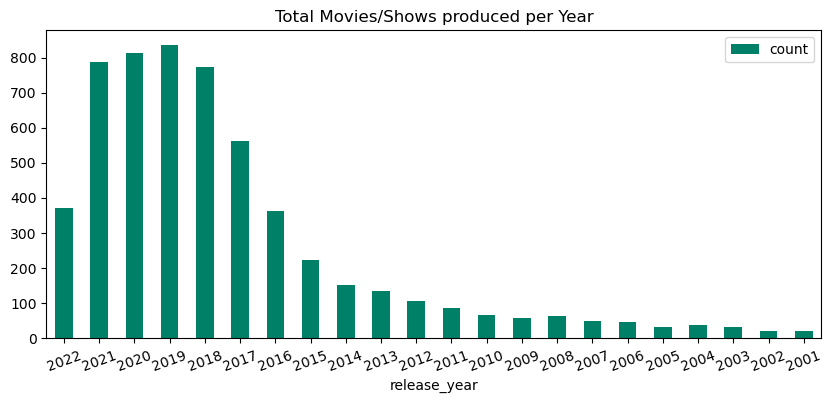

In [ ]:
dfp = dftitles[dftitles['release_year'] > 2000]['release_year'].value_counts().reset_index()
dfp.columns = ['release_year','count']
dfp.sort_values('release_year',ascending = False).plot.bar(x='release_year', y='count', rot=20, figsize=(10,4),colormap='summer',title='Total Movies/Shows produced per Year')


In [ ]:
#dfp.sort_values('Year',ascending = False).plot.bar(x='Year', y='Counts', rot=45, color_discrete_sequence=px.colors.qualitative.G10,figsize=(15,5))

In [ ]:
dfshows = dftitles[dftitles['type'] == 'SHOW']

In [ ]:
dfmovies = dftitles[dftitles['type'] == 'MOVIE']

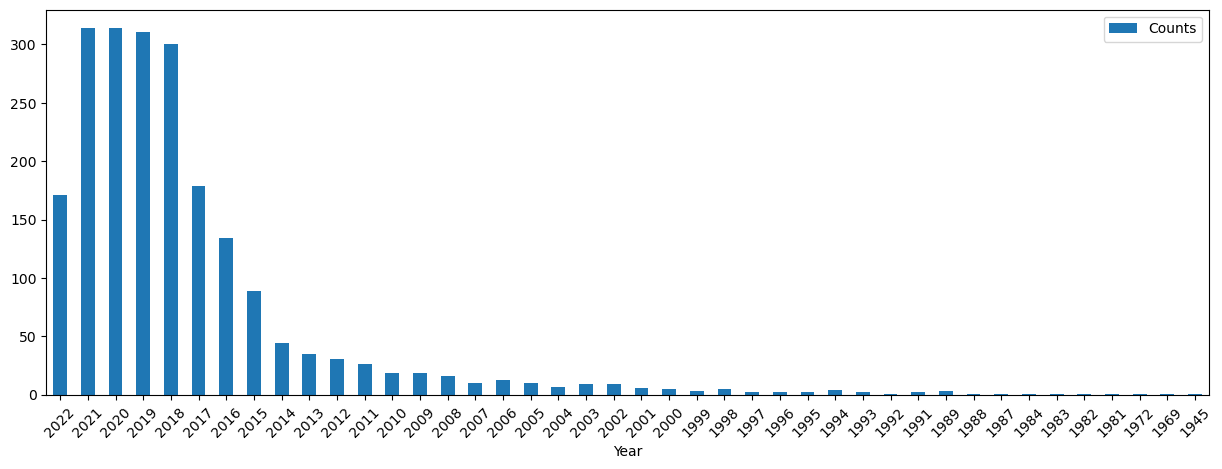

In [ ]:
#Find for Shows and Movies if the data is distributed the same way.
dfs = dfshows[['release_year']].value_counts().reset_index()
dfs.columns = ['Year','Counts']
#dfs.sort_values('Year', ascending = False).head()
dfs.sort_values('Year',ascending = False).plot.bar(x='Year', y='Counts', rot=45, figsize=(15,5))
None

<Axes: xlabel='Year'>

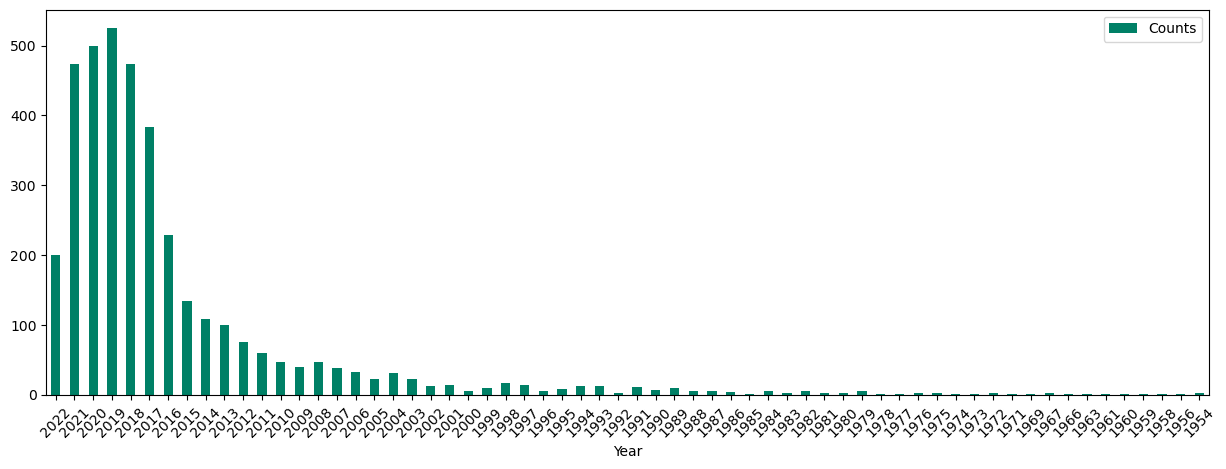

In [ ]:
dfm = dfmovies[['release_year']].value_counts().reset_index()
dfm.columns = ['Year','Counts']
#dfm.sort_values('Year', ascending = False).head()
dfm.sort_values('Year',ascending = False).plot.bar(x='Year', y='Counts', rot=45,colormap='summer', figsize=(15,5))

In [ ]:
#Take only years 2015 - 2022
df1522 = dftitles[dftitles['release_year'] >= 2015]

### Conclusion

The number of titles increases by year

In [ ]:
df1522.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4729 entries, 1121 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4729 non-null   object 
 1   title                 4728 non-null   object 
 2   type                  4729 non-null   object 
 3   description           4713 non-null   object 
 4   release_year          4729 non-null   int64  
 5   age_certification     2482 non-null   object 
 6   runtime               4729 non-null   int64  
 7   genres                4729 non-null   object 
 8   production_countries  4729 non-null   object 
 9   seasons               1812 non-null   float64
 10  imdb_id               4375 non-null   object 
 11  imdb_score            4310 non-null   float64
 12  imdb_votes            4296 non-null   float64
 13  tmdb_popularity       4663 non-null   float64
 14  tmdb_score            4489 non-null   float64
dtypes: float64(5), int

In [ ]:
df1522.shape

(4729, 15)

In [ ]:
df1522['id'].nunique()

4729

In [ ]:
df1522['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [ ]:
df1522['age_certification'].unique()

array(['TV-MA', 'TV-14', 'TV-PG', 'PG-13', 'R', 'TV-Y7', 'PG', nan,
       'TV-G', 'NC-17', 'TV-Y', 'G'], dtype=object)

In [ ]:
df1522.isna().sum()

id                         0
title                      1
type                       0
description               16
release_year               0
age_certification       2247
runtime                    0
genres                     0
production_countries       0
seasons                 2917
imdb_id                  354
imdb_score               419
imdb_votes               433
tmdb_popularity           66
tmdb_score               240
dtype: int64

In [ ]:
#clean fields like 'production_countries' and 'genres' that have some garbage characters.

df1522['production_countries'] = df1522['production_countries'].str.strip('[]').str.replace("'","", regex=True)
df1522['production_countries'] = df1522['production_countries'].str.replace('\s', "", regex = True)

In [ ]:
df1522['genres'] = df1522['genres'].str.strip('[]').str.replace("'","", regex=True)
df1522['genres'] = df1522['genres'].str.replace('\s', "", regex = True)

In [ ]:
#Copy upto here to cover the work 
df = df1522.copy()

OUTLIERS

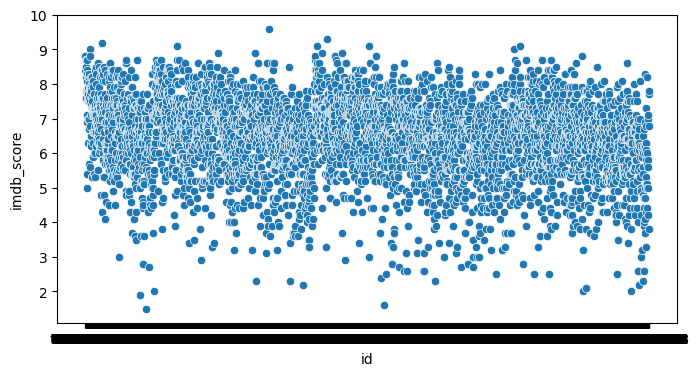

In [ ]:
#Make a plot of the scores by product id. It looks with no dependency
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'id', y = 'imdb_score', data = df)
plt.show()

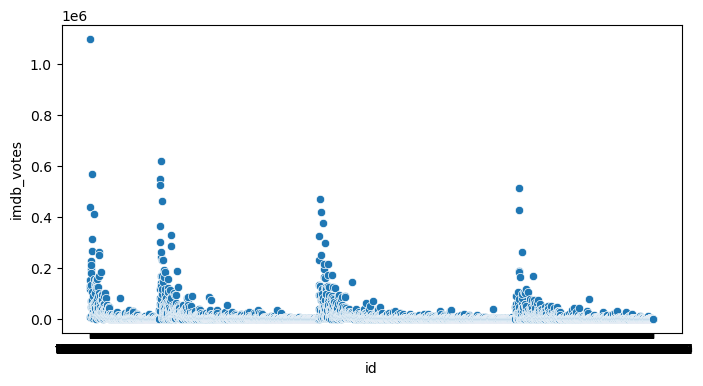

In [ ]:
#Make a plot of the total votes by product id. It looks with no dependency
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'id', y = 'imdb_votes', data = df)
plt.show()

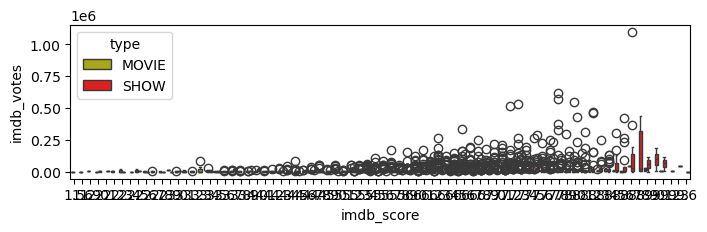

In [ ]:
#See the outliers I am having for the scoring/voting of IMDB
plt.figure(figsize = (8,2))
sns.boxplot(x = 'imdb_score', y = 'imdb_votes', hue = 'type', palette=['y', 'r'], data = df)
plt.show()

In [ ]:
#The votes seem to have a lot of outliers Need to correct this. The values upto 75% of our specimen is 100 times less than the max !
# Also min values begin with 5 and end up 10 ^6
df['imdb_votes'].describe()

count    4.296000e+03
mean     1.243246e+04
std      4.167856e+04
min      5.000000e+00
25%      5.007500e+02
50%      1.871000e+03
75%      7.183500e+03
max      1.101055e+06
Name: imdb_votes, dtype: float64

In [ ]:
#Seems to be better distributed compared to the number of votes.
df['imdb_score'].describe()

count    4310.000000
mean        6.438051
std         1.158417
min         1.500000
25%         5.700000
50%         6.550000
75%         7.300000
max         9.600000
Name: imdb_score, dtype: float64

In [ ]:
df[df['imdb_votes'] == df['imdb_votes'].max()].count()

id                      1
title                   1
type                    1
description             1
release_year            1
age_certification       1
runtime                 1
genres                  1
production_countries    1
seasons                 1
imdb_id                 1
imdb_score              1
imdb_votes              1
tmdb_popularity         1
tmdb_score              1
dtype: int64

In [ ]:
df[df['imdb_votes'] == df['imdb_votes'].max()]['id']

1123    ts38796
Name: id, dtype: object

In [ ]:
df[df['id'] == 'ts38796']

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1123,ts38796,Stranger Things,SHOW,"When a young boy vanishes, a small town uncove...",2016,TV-14,61,"scifi,thriller,drama,fantasy,horror",US,5.0,tt4574334,8.7,1101055.0,2226.231,8.635


We have so big difference for only 1 SHOW the STRANGER THINGS. US . scifi,thriller,drama,fantasy,horror	

Remove this ONE ROW  with the millions of votes.It is definately an outlier

In [ ]:
#Find the index of the row associated with the maximum value of imdb_votes. In order to remove this from 
#the dataset

index_retrofit = df[df['imdb_votes'] == df['imdb_votes'].max()].index

In [ ]:
df.drop(index_retrofit,inplace = True)

In [ ]:
df.shape

(4728, 15)

### Handle Outliers

In [ ]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [ ]:
#column 12 is the imdb_votes
collist = [12]

In [ ]:
#Create a dictionary with only 1 column the imdb_votes. Use this to remove the outliers
dfimdbvotes=df[df.columns[collist]]

In [ ]:
# Index List of Non-Outliers of votes
nonOutlierList = Remove_Outlier_Indices(dfimdbvotes)

In [ ]:
# Non-Outlier Subset of the column imdb_votes of the  DataFrame
df['imdb_votes'] = dfimdbvotes[nonOutlierList]

In [ ]:
#normalized DataFrame
dfnorm = df.dropna(subset=['imdb_votes'])

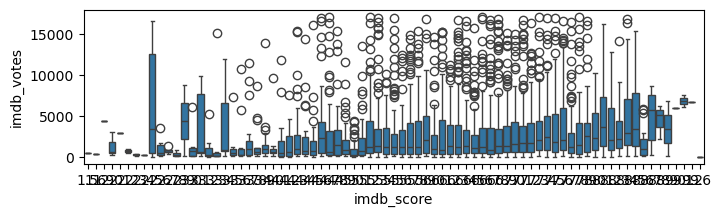

In [ ]:
#See the outliers I am having for the scoring/voting of IMDB
plt.figure(figsize = (8,2))
sns.boxplot(y = 'imdb_votes', x = 'imdb_score', data = dfnorm)
plt.show()

In [ ]:
dfnorm.shape

(3671, 15)

In [ ]:
#75% of the Netflix products have a 3900 votings. the rest 900 have upto 17099..
#Hence we do not have many products with votes > 3920. As it shows above they are still outliers
dfnorm[dfnorm['imdb_votes']>3922]['id'].count()

918

In [ ]:
dfnorm['imdb_votes'].describe()

count     3671.000000
mean      2852.919640
std       3636.768859
min          5.000000
25%        379.500000
50%       1330.000000
75%       3921.500000
max      17099.000000
Name: imdb_votes, dtype: float64

In [ ]:
dfnorm['imdb_score'].describe()

count    3671.000000
mean        6.364451
std         1.160315
min         1.500000
25%         5.700000
50%         6.500000
75%         7.200000
max         9.600000
Name: imdb_score, dtype: float64

### See about data Correlations in the dataframe

C:\Users\kathe\AppData\Local\Temp\ipykernel_38176\2048121894.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfnorm.corr().abs(),  annot=True, cmap="Blues")


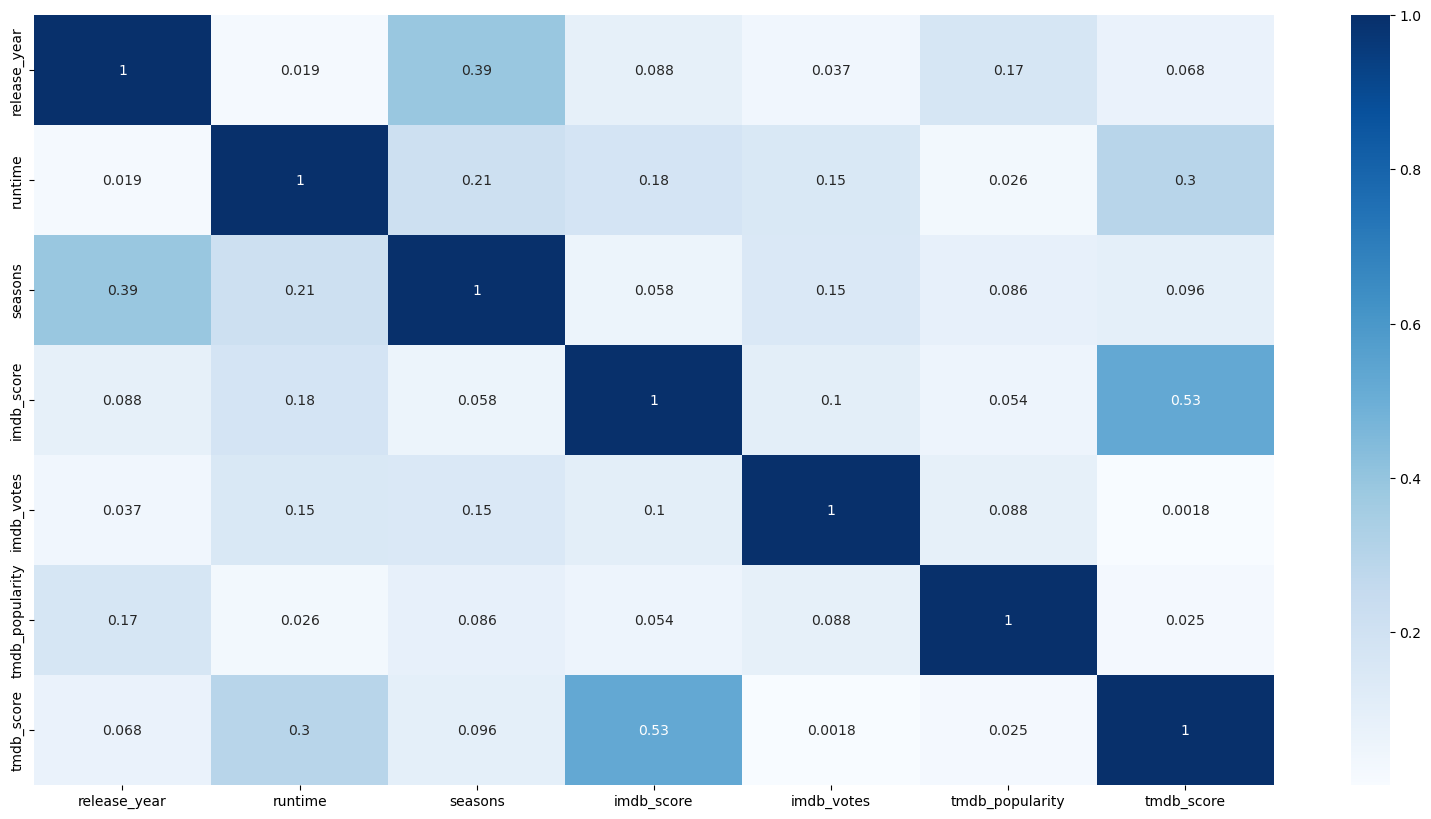

In [ ]:
#See if any of the variables are correlated. We see that IMDB and TMDB are slightly 
#correlated. We have decided to use only one of the scores. We have selected teh IMDB database
plt.figure(figsize=(20, 10))
sns.heatmap(dfnorm.corr().abs(),  annot=True, cmap="Blues")
None

### Creation of a normalized Rating

In [ ]:
#dfnorm has all entries where imdb_votes with minimum outliers.
dfw=dfnorm.copy()

In [ ]:
#Create a normalized score that takes account of both the score value but also the number of votes
#to use this for the analysis
dfw['imdb_scoring'] = dfw['imdb_score'] * dfw['imdb_votes']

In [ ]:
dfw['weighted_scoring'] = 100*(dfw['imdb_scoring']-dfw['imdb_scoring'].min())/(dfw['imdb_scoring'].max()-dfw['imdb_scoring'].min())

In [ ]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 1122 to 5849
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3671 non-null   object 
 1   title                 3671 non-null   object 
 2   type                  3671 non-null   object 
 3   description           3668 non-null   object 
 4   release_year          3671 non-null   int64  
 5   age_certification     1804 non-null   object 
 6   runtime               3671 non-null   int64  
 7   genres                3671 non-null   object 
 8   production_countries  3671 non-null   object 
 9   seasons               1450 non-null   float64
 10  imdb_id               3671 non-null   object 
 11  imdb_score            3671 non-null   float64
 12  imdb_votes            3671 non-null   float64
 13  tmdb_popularity       3618 non-null   float64
 14  tmdb_score            3502 non-null   float64
 15  imdb_scoring      

In [ ]:
dfw['weighted_scoring'].describe()

count    3671.000000
mean       13.175612
std        17.222053
min         0.000000
25%         1.621657
50%         6.007199
75%        17.769356
max       100.000000
Name: weighted_scoring, dtype: float64

In [ ]:
dfw.columns


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'imdb_scoring', 'weighted_scoring'],
      dtype='object')

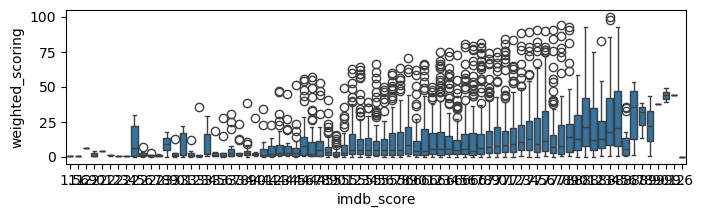

In [ ]:
#See the outliers I am having for the scoring/voting of IMDB
plt.figure(figsize = (8,2))
sns.boxplot(x = 'imdb_score', y = 'weighted_scoring', data = dfw)
plt.show()

SHAPING THE DATAFRAME - REMOVE NON Necessary Columns

In [ ]:
#remove columns that are not to be used. 
# DFNEW has 1522, and the dfw. Normalized on imdb_votes

dfnew = dfw.copy()

In [ ]:
dfnew.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'imdb_scoring', 'weighted_scoring'],
      dtype='object')

In [ ]:
dfnew.head(1)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,imdb_scoring,weighted_scoring
1122,ts37143,Alone,SHOW,Hardcore survivalists are put by themselves in...,2015,TV-MA,51,"reality,documentation",US,9.0,tt4803766,8.4,5037.0,26.93,7.0,42310.8,30.006756


In [ ]:
dfnew.reset_index(inplace=True, drop=True)

In [ ]:
#KEEP only specific columns for which we can run an analysis
#'id', 'title', 'type','release_year', 'age_certification', 'runtime', 'genres', 'production_countries',
#       'seasons', 'imdb_score','weighted_scoring'

#Columnnns to keep
col_list = [0,1,2,4,5,6,7,8,9,11,12,16]

In [ ]:
dfnew = dfw[dfw.columns[col_list]]

In [ ]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 1122 to 5849
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3671 non-null   object 
 1   title                 3671 non-null   object 
 2   type                  3671 non-null   object 
 3   release_year          3671 non-null   int64  
 4   age_certification     1804 non-null   object 
 5   runtime               3671 non-null   int64  
 6   genres                3671 non-null   object 
 7   production_countries  3671 non-null   object 
 8   seasons               1450 non-null   float64
 9   imdb_score            3671 non-null   float64
 10  imdb_votes            3671 non-null   float64
 11  weighted_scoring      3671 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 372.8+ KB


### ANALYZING DATA

### See How Scoring Evolves since 2015. 
### Conclusion
People continue to vote and it seems that the average ranking has been the same throughout the years.
This means that Netflix knows their audience and manages to keep them satisfied with the offers
that they make

In [ ]:
dfplot = dftitles[dftitles['release_year']>2010].groupby('release_year')[['imdb_votes']].count().reset_index()
dfplot.head()

,release_year,imdb_votes
0,2011,79
1,2012,104
2,2013,125
3,2014,144
4,2015,212


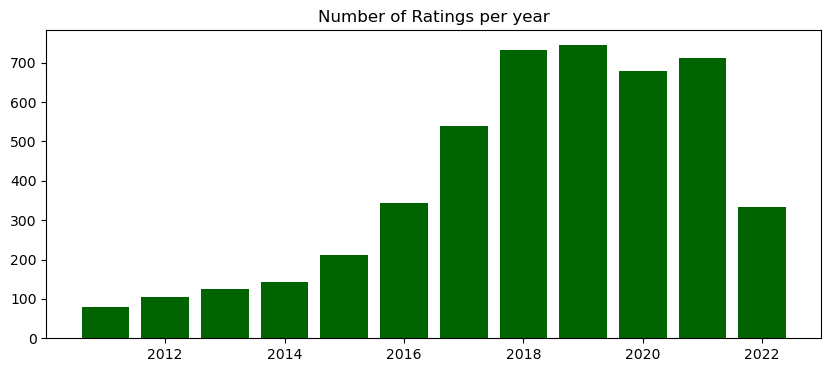

In [ ]:
x = dfplot['release_year']
y = dfplot['imdb_votes']
plt.figure(figsize=(10,4))
plt.title('Number of Ratings per year')
#plt.xlabel('Release Year')
#plt.ylabel('Number of Ratings')
plt.bar(x,y, color = 'darkgreen')
None

In [ ]:
dfplot = dfnew.groupby('release_year')[['weighted_scoring']].mean().reset_index()

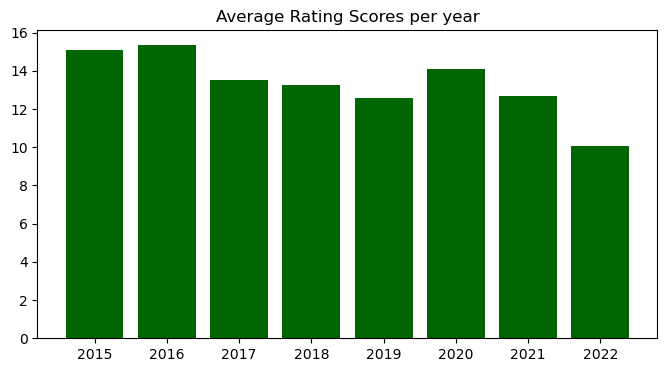

In [ ]:
x = dfplot['release_year']
y = dfplot['weighted_scoring']
plt.figure(figsize=(8,4))
plt.title('Average Rating Scores per year')
#plt.xlabel('Release Year')
#plt.ylabel('Average Ratings')
plt.bar(x,y, color='darkgreen')
None

### 1. Genre popularity by IMDB Score weighted average since 2015
Finding the occurence of Genres in all bins of Genres as found in the Dataframe

Using the initial dataframe without any normalization, for findings relevant to 
most occuring Genres in all Netflix Catalog. 
Gerne groupings have been broken

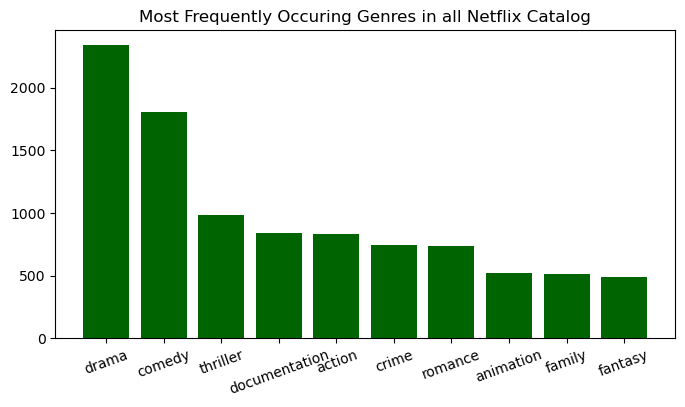

In [ ]:
x=list(genres_occurence(df1522).keys())[0:10]
y=list(genres_occurence(df1522).values())[0:10]
plt.figure(figsize=(8,4))
plt.title('Most Frequently Occuring Genres in all Netflix Catalog')
#plt.xlabel('Genres')
#plt.ylabel('Total Ratings')
plt.bar(x,y, color ='darkgreen')
plt.xticks(rotation=20)
None

In [ ]:
dfnew['weighted_scoring'].describe()

count    3671.000000
mean       13.175612
std        17.222053
min         0.000000
25%         1.621657
50%         6.007199
75%        17.769356
max       100.000000
Name: weighted_scoring, dtype: float64

Create bins of ratings. [0-1.4] where I have 25% [1.4-5]: 25%, [5-13.5]: 25%,[13.5- 42]: 25%

In [ ]:
#Create bins to allocate the scores, so as to facilitate the analysis for High Scores.
dfnew.loc[dfnew['weighted_scoring'] >= 17, 'ScoringBin'] = 'High'
dfnew.loc[(dfnew['weighted_scoring'] < 17) & (dfnew['weighted_scoring'] >= 4.0), 'ScoringBin'] = 'Medium'
#dfnew.loc[(dfnew['weighted_scoring'] < 6.0) & (dfnew['weighted_scoring'] >= 1.6), 'ScoringBin'] = 'MediumDown'
dfnew.loc[dfnew['weighted_scoring'] < 4.0, 'ScoringBin'] = 'Low'

In [ ]:
dfscores = dfnew['ScoringBin'].value_counts().reset_index()


In [ ]:
dfscores

,index,ScoringBin
0,Low,1550
1,Medium,1166
2,High,955


In [ ]:
dfnew['ScoringBin'].value_counts()

Low       1550
Medium    1166
High       955
Name: ScoringBin, dtype: int64

In [ ]:
names = ['ScoringBin', 'Counts']


In [ ]:
dfscores.columns = names

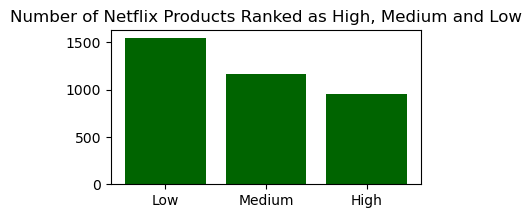

In [ ]:
x= dfscores['ScoringBin']
y= dfscores['Counts']
plt.figure(figsize=(4,2))
plt.title('Number of Netflix Products Ranked as High, Medium and Low')
#plt.xlabel('Genres')
#plt.ylabel('Total Ratings')
plt.bar(x,y, color ='darkgreen')
#plt.xticks(rotation=45)
None

In [ ]:
#Create a dataframe only for the high rated products
dfnewhigh = dfnew[dfnew['ScoringBin'] =='High']

In [ ]:
len(dfnewhigh)

955

In [ ]:
dfnewhigh['type'].value_counts()

MOVIE    588
SHOW     367
Name: type, dtype: int64

In [ ]:
#Create a dataframe only for the low rated products
dfnewlow = dfnew[dfnew['ScoringBin'] =='Low']

In [ ]:
dfnewlow['type'].value_counts()

MOVIE    924
SHOW     626
Name: type, dtype: int64

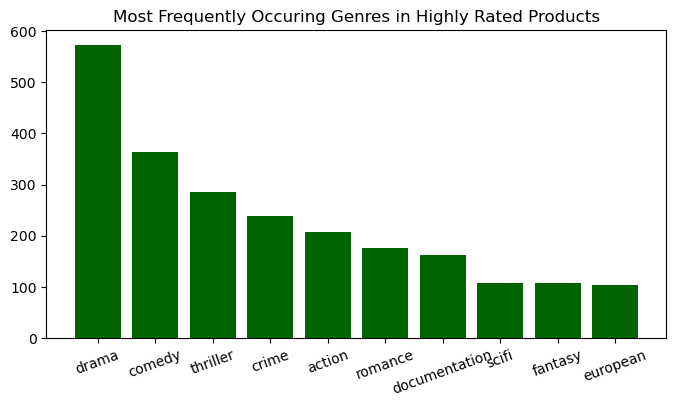

In [ ]:
x=list(genres_occurence(dfnewhigh).keys())[0:10]
y=list(genres_occurence(dfnewhigh).values())[0:10]
plt.figure(figsize=(8,4))
plt.title('Most Frequently Occuring Genres in Highly Rated Products')
#plt.xlabel('Genres')
#plt.ylabel('Rating')
plt.bar(x,y, color ='darkgreen')
plt.xticks(rotation=20)
None

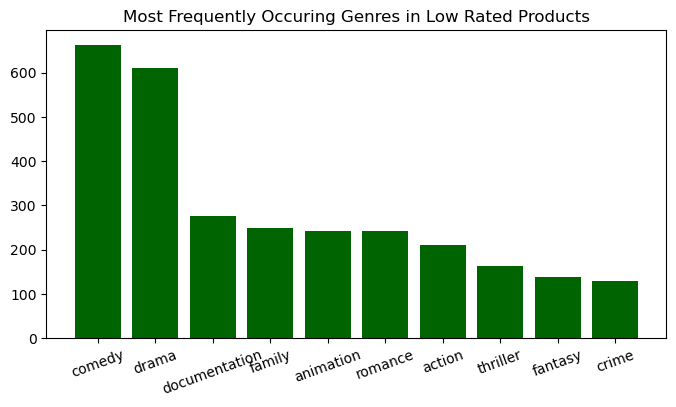

In [ ]:

x=list(genres_occurence(dfnewlow).keys())[0:10]
y=list(genres_occurence(dfnewlow).values())[0:10]
plt.figure(figsize=(8,4))
plt.title('Most Frequently Occuring Genres in Low Rated Products')
#plt.xlabel('Genres')
#plt.ylabel('Rating')
plt.bar(x,y,color = 'darkgreen')
plt.xticks(rotation=20)
None

### Combination / Grouping Product Genre

In [ ]:
#eliminate no values in genres column. It shows in the graph.
dfnewhigh['genres'].replace('', np.nan, inplace=True)
dfnewhigh.dropna(inplace = True)

In [ ]:
dfnewhigh['genres'].isna().sum()

0

In [ ]:
#See how combination genres are occuring in numbers
dfcombination_genre = dfnewhigh['genres'].value_counts().head(10).reset_index()
dfcombination_genre.columns = ['Genre','Counts']

<Axes: title={'center': 'Top 10 Highly Rated Genres COMBOs'}, xlabel='Genre'>

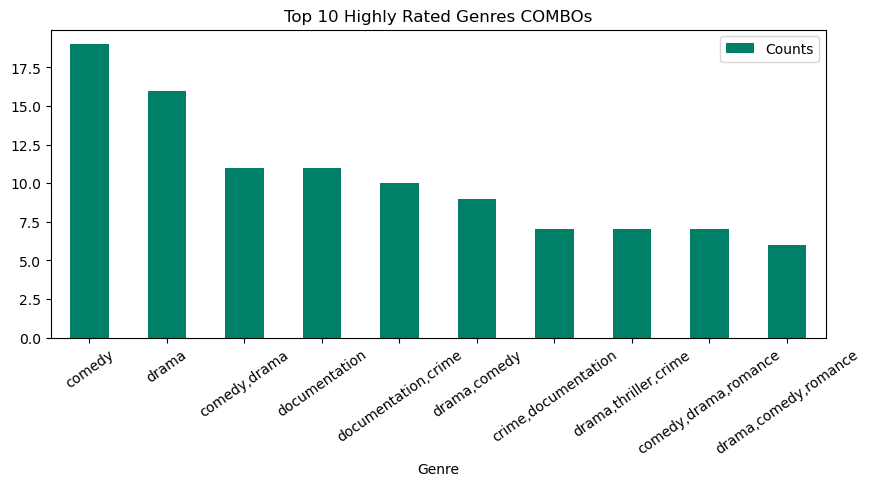

In [ ]:
dfcombination_genre.sort_values('Counts', ascending = False).plot.bar(x='Genre', y='Counts',figsize = (10,4), rot=35, colormap = 'summer',title = 'Top 10 Highly Rated Genres COMBOs')

How Genres Occur as Products throughout the Years


In [ ]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
years


[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

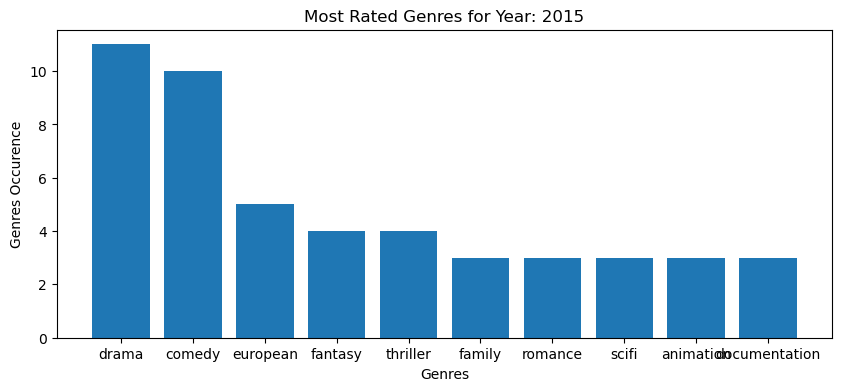

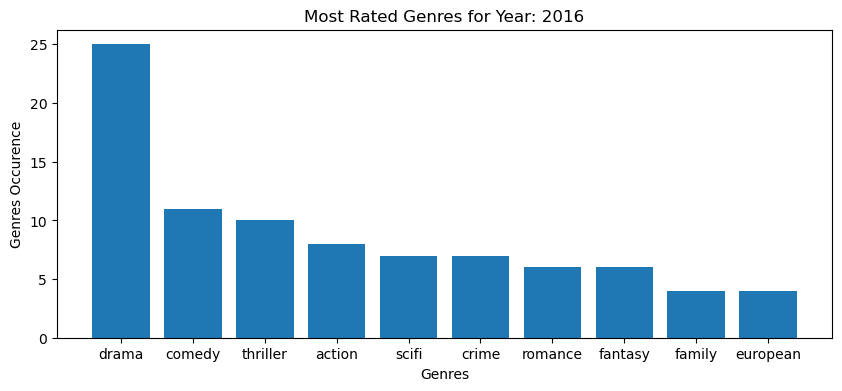

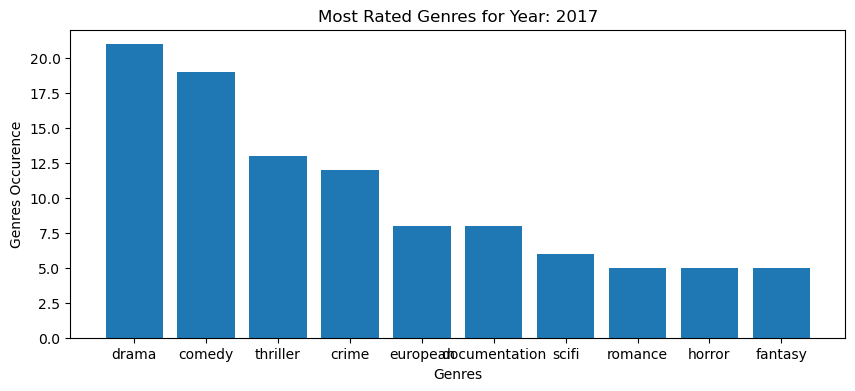

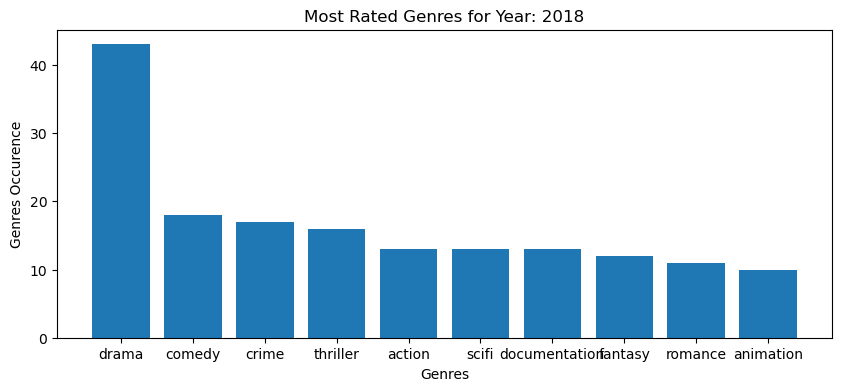

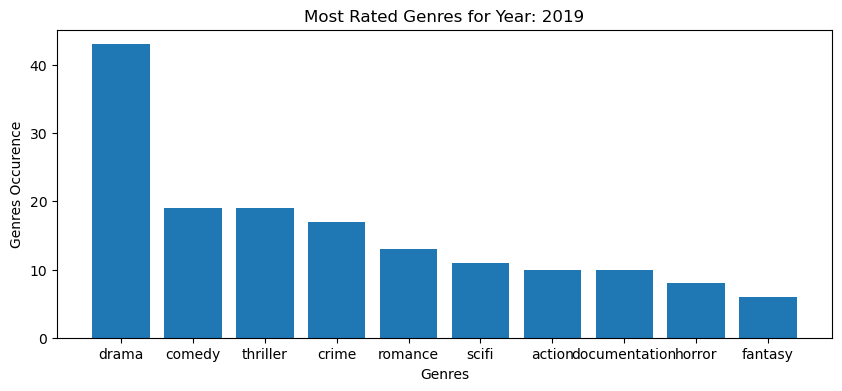

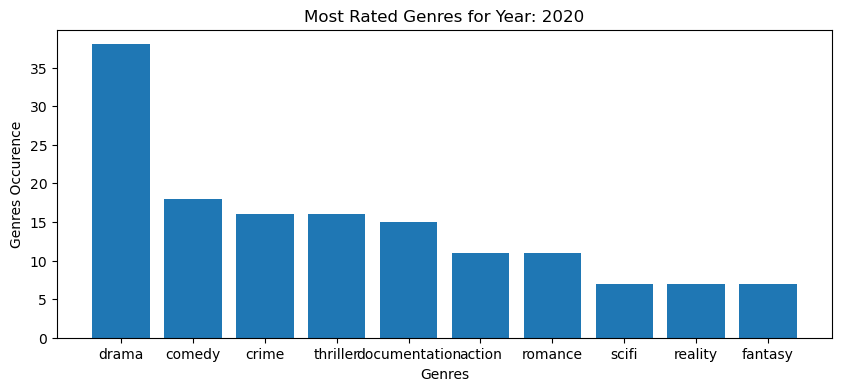

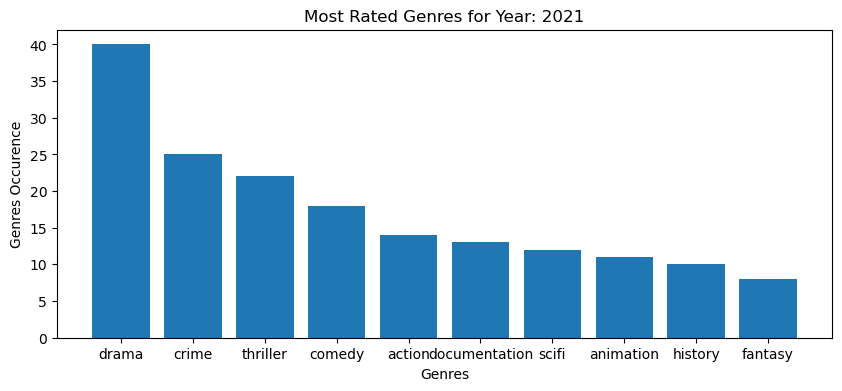

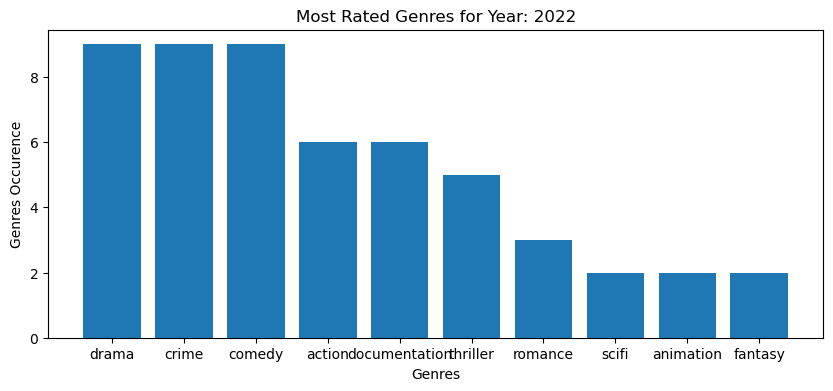

In [ ]:
#Plot graphs iterating through the years
for year in years:
    x = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == year]).keys())[0:10]
    y = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == year]).values())[0:10]
    plt.figure(figsize=(10,4))
    plt.title('Most Rated Genres for Year: {}'.format(year))
    plt.xlabel('Genres')
    plt.ylabel('Genres Occurence')
    plt.bar(x,y)
    None

>>> import pandas as pd
>>> simple_list=[['a','b']]
>>> simple_list.append(['e','f'])
>>> df=pd.DataFrame(simple_list,columns=['col1','col2'])

In [ ]:
#Find for all years since 2015 the top 10 geres and wether these re appear 
#to see which ones are most popular. Write to csv file
l1 = list(genres_occurence(dfnew).keys())[0:10]
l2 = list(genres_occurence(dfnewhigh).keys())[0:10]
l3 = list(genres_occurence(dfnewlow).keys())[0:10]
#dfcombination_genre = dfnewhigh['genres'].value_counts().head(10).reset_index()
l4 = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == 2015]).keys())[0:10]
l5 = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == 2016]).keys())[0:10]
l6 = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == 2017]).keys())[0:10]
l7 = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == 2018]).keys())[0:10]
l8 = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == 2019]).keys())[0:10]
l9 = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == 2020]).keys())[0:10]
l10 = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == 2021]).keys())[0:10]
l11 = list(genres_occurence(dfnewhigh[dfnewhigh['release_year'] == 2022]).keys())[0:10]
l12 = list(dfcombination_genre['Genre'])


In [ ]:
simple_list = []
simple_list.append(l1)
simple_list.append(l2)
simple_list.append(l3)
simple_list.append(l4)
simple_list.append(l5)
simple_list.append(l6)
simple_list.append(l7)
simple_list.append(l8)
simple_list.append(l9)
simple_list.append(l10)
simple_list.append(l11)
simple_list.append(l12)




In [ ]:
simple_list.append(l12)

In [ ]:
sa = pd.Series(simple_list)

In [ ]:
sa

0     [drama, comedy, documentation, thriller, roman...
1     [drama, comedy, crime, thriller, documentation...
2     [comedy, drama, documentation, family, animati...
3     [drama, comedy, european, fantasy, thriller, f...
4     [drama, comedy, thriller, action, scifi, crime...
5     [drama, comedy, thriller, crime, european, doc...
6     [drama, comedy, crime, thriller, action, scifi...
7     [drama, comedy, thriller, crime, romance, scif...
8     [drama, comedy, crime, thriller, documentation...
9     [drama, crime, thriller, comedy, action, docum...
10    [drama, crime, comedy, action, documentation, ...
11    [comedy, drama, comedy,drama, documentation, d...
12    [comedy, drama, comedy,drama, documentation, d...
dtype: object

In [ ]:
sa.to_csv('CSVGENCOMPARISOM.csv')

### Conclusion 1

Most appreciated GENRE from the audience are - 
Highest product genre from ratings : Drama, Comedy, Thriller, Crime, Action, Documentation, Romance, Fantacy, European, Scifi.
Lowest products genre from ratings: Comedy, Drama, Animation, Family, Documentation, Romance, Action, Thriller, Fantacy, Crime.
Occuring in Netflix as Products available to their clients:
Drama, Comedy, Documentation, Romance, Thriller, Action, Crime, Family, Animation, Fantacy.

Animation, Family, Fantacy do not occur in Highly Rated Products but occur in Low Ranking. So, they are really not preferred. Netflix could consider giving less priority in these.

Documantaries counts are large in rankings and in product occurence. We think that this happens due to the combinatorial/Grouped Genres, where documentary,crime or documentary,comedy occur as highly rated. This pobably means that real life stories are preferred and this is why it appears as a genre characterizing high rated products.

Crimes occured in the high rated list in 2021 and had a better ranking in 22. So maybe consider investment
Action  are within top 5 every year
Thriller in top 5 but lowering a bit in 21 and 22
Romance reappearing in 2022 after laggin behind since 2015.

In fewer words:
Drama , Comedy , thriller, crime , romance from real stories are most highly ranked
Animation and Family could be a lower priority



### 2 Genre popularity by Weighed Score over time for SHOW and MOVIE

In [ ]:
#in the high rated products SHOW and MOVIES have an equal representation.
dfnewhigh.groupby('type')[['weighted_scoring']].mean().sort_values('weighted_scoring',ascending = False).reset_index()


,type,weighted_scoring
0,SHOW,39.744298


Text(0.5, 1.0, 'Preference of Movies vs Shows')

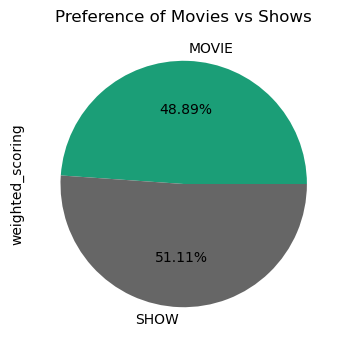

In [ ]:
dfnew.groupby('type')['weighted_scoring'].mean().plot.pie(figsize=(4,4),colormap='Dark2',autopct='%.2f%%')
plt.title('Preference of Movies vs Shows')

### 2A See how many Movies / Shows Netflix has 

In [ ]:
#To find this , I do not need the normalized dataframe. I can go to the df1522

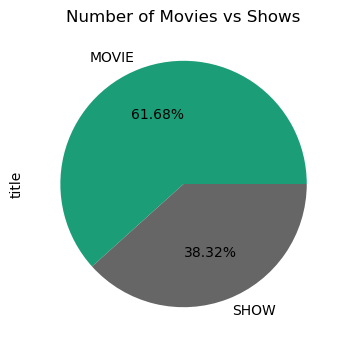

In [ ]:
df1522.groupby('type')['title'].count().plot.pie(figsize=(4,4),colormap='Dark2', autopct='%.2f%%')
plt.title('Number of Movies vs Shows')
None

### Conclusion 2

Both Movies and Shows are rated equally from the audience. Still almost 62% of Netflix products are Movies. 
Maybe consider investing a bit more in Shows as well.

### ### Geographies to be considered as most successful in ranking

In [ ]:
df1522.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4729 entries, 1121 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4729 non-null   object 
 1   title                 4728 non-null   object 
 2   type                  4729 non-null   object 
 3   description           4713 non-null   object 
 4   release_year          4729 non-null   int64  
 5   age_certification     2482 non-null   object 
 6   runtime               4729 non-null   int64  
 7   genres                4729 non-null   object 
 8   production_countries  4729 non-null   object 
 9   seasons               1812 non-null   float64
 10  imdb_id               4375 non-null   object 
 11  imdb_score            4310 non-null   float64
 12  imdb_votes            4296 non-null   float64
 13  tmdb_popularity       4663 non-null   float64
 14  tmdb_score            4489 non-null   float64
dtypes: float64(5), int

In [ ]:
df1522['production_countries'].head()

1121    US
1122    US
1123    US
1124    CA
1125    US
Name: production_countries, dtype: object

In [ ]:
#Find single countries occurence (without grouping - as the production_countries column, has groupings of countries)
countries = df1522['production_countries'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).value_counts().reset_index().head(10)


In [ ]:
countries.columns = ['Country','Counts']

In [ ]:
countries.head()

,Country,Counts
0,US,1832
1,IN,382
2,GB,313
3,JP,212
4,,211


In [ ]:
#Eliminate Empty columns - without a production country
countries['Country'].replace('', np.nan, inplace=True)
countries.dropna(inplace = True)

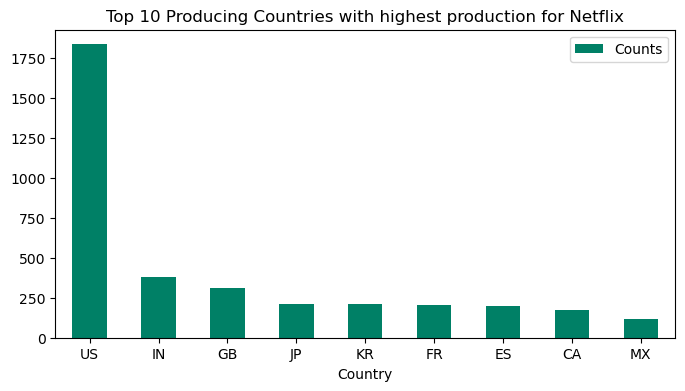

In [ ]:
countries.sort_values('Counts', ascending = False).plot.bar(x='Country', y='Counts',figsize = (8,4), rot = 360,title = 'Top 10 Producing Countries with highest production for Netflix',colormap= 'summer')
None

Producing Coiuntries as seen above: US, IN, GB, JP, KR, FR, ES, CA, MX

In [ ]:
countries_ranked_high = dfnewhigh['production_countries'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).value_counts().reset_index().head(10)

countries_ranked_high.columns = ['Country','Counts']

In [ ]:
#Country production of highly ranked genres
countries_ranked_high.head()

,Country,Counts
0,US,150
1,GB,33
2,KR,31
3,JP,20
4,FR,15


<Axes: title={'center': 'Top 10 Countries Producing High Ranked Products'}, xlabel='Country'>

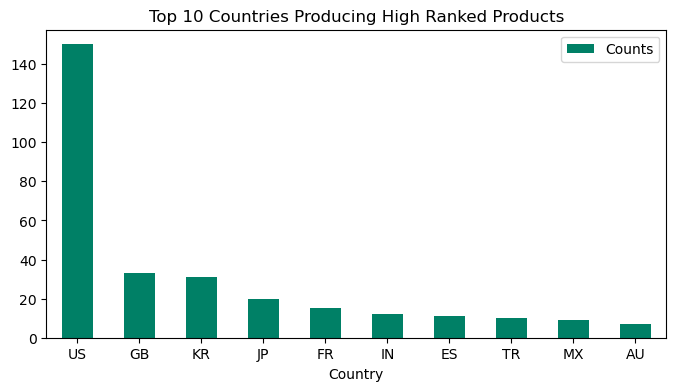

In [ ]:
countries_ranked_high.sort_values('Counts', ascending = False).plot.bar(x='Country', y='Counts',figsize = (8,4), rot=360, title = \
    'Top 10 Countries Producing High Ranked Products',colormap='summer')

Ranked High Genres Production Countries: US IN, GB, GB, ES, FR, KR, JP, CA, DE

In [ ]:
#Countris Producing Products that are ranked LOW
countries_ranked_low = dfnewlow['production_countries'].str.split(',',expand=True).stack().reset_index(level=1,drop=True).value_counts().reset_index().head(10)
countries_ranked_low.columns = ['Country','Counts']

In [ ]:
#Cleaning empty country fields
countries_ranked_low['Country'].replace('', np.nan, inplace=True)
countries_ranked_low.dropna(inplace = True)

<Axes: title={'center': 'Top 10 Countries Producing LOW Ranked Products'}, xlabel='Country'>

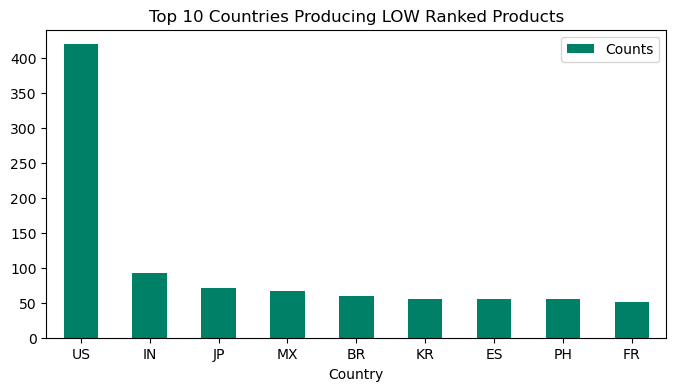

In [ ]:
countries_ranked_low.sort_values('Counts', ascending = False).plot.bar(x='Country', y='Counts',figsize = (8,4), rot=360, title = \
    'Top 10 Countries Producing LOW Ranked Products',colormap = 'summer')

Countries producing products that are low Ranked:  US, IN, MX, NG, PH, KR, JP, BR, FR

In [ ]:
#Producing: US, IN, GB, JP, KR, FR, ES, CA, MX
#RAnking High US IN, GB, GB, ES, FR, KR, JP, CA, DE
#Rankging LOW : US, IN, MX, NG, PH, KR, JP, BR, FR

### CONCLUSIONS

US is dominating the production of all Netflix products with India coming second and GB third. But all other than US countries have less than 1/3 of the US production and even lower.
Same stands for the Highly rated products
So Neflix is well situated in the production of highly rated products.They are selecting countries that can manage the demand for quality.
NG, PH BR: appear in the low ranked countrie. 

### Make a GEO plot of countries

In [ ]:
#Geographical Representation of Countries
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
#import Country Codes --> Translated to country names
from iso_country_codes import d

In [ ]:
def func_countrynameslist(thedf, year,d):
    '''This fuction will take the dictionary of Netflix, and return a series with all single countries with their occuring counts. It will\
         separate the countries in case of a combination '''
    countrtylist = thedf[thedf['release_year'] == year]['production_countries'].str.split(',', expand = True).stack().reset_index(level=1, drop=True)
    cl = pd.Series(list(map(d.get, countrylist, countrylist)))
    cl.replace('', np.nan, inplace=True)
    cl.dropna(inplace = True)
    return cl

In [ ]:
def plotearth(thedf,year,d):
    '''Function to create an earth plot showing the counts prevailing in each country'''
    #d is the dictionary with ISO country codes translated to country names
    #define the dictionary upon which to run the loop
    #thedf = dfnewhigh
    loc = func_countrynameslist(thedf, year,d)
    fig = go.Figure(data=go.Choropleth(locationmode='country names',locations = loc, z = loc.value_counts()\
                                       , reversescale=False, colorbar_title = 'Product Counts'))
    fig.update_layout( title_text='Production Countries for year {}'.format(year),
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.5,
        y=0,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
    )
    return fig.show()

Separate STEPS

In [ ]:
#dfnew['production_countries'].str.split(',', expand = True).stack().value_counts().reset_index()

In [ ]:
len(dfnew)

3671

In [ ]:
#Make alist of all unique countries for all years from 2015 - 2022
countrylist = dfnew['production_countries'].str.split(',', expand = True).stack().reset_index(level=1, drop=True)
countrynameslist = pd.Series(list(map(d.get, countrylist, countrylist)))
countrynameslist.replace('', np.nan, inplace=True)
countrynameslist.dropna(inplace=True)
mp = countrynameslist.value_counts().reset_index()
mp.columns = ['Country','Count']


In [ ]:
#One way to plot. More basic
#iplot([go.Choropleth(locationmode='country names',locations = countrynameslist, z = countrynameslist.value_counts())])

We will create an earth heatmap for ALL YEARS 2015 - 2022 for all genres to see all possible countries participating in producing for netflix.

In [ ]:
#Figure Printout with more variables and creating title and color bar text
fig = go.Figure(data=go.Choropleth(locationmode='country names',locations = mp['Country'], z = mp['Count'], reversescale=False\
       , colorbar_title = 'Product Counts') )
fig.update_layout( title_text='Production Countries for 2015 - 2022',
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.5,
        y=0,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
    )
fig.show()

We will create an earth heatmap for ALL Yeas 2915 - 2022  of high rated products and which countries contribute to it. t

In [ ]:
countrylist = dfnewhigh['production_countries'].str.split(',', expand = True).stack().reset_index(level=1, drop=True)
countrynameslist = pd.Series(list(map(d.get, countrylist, countrylist)))
countrynameslist.replace('', np.nan, inplace=True)
countrynameslist.dropna(inplace=True)
mp = countrynameslist.value_counts().reset_index()
mp.columns = ['Country','Count']

In [ ]:
fig = go.Figure(data=go.Choropleth(locationmode='country names',locations = mp['Country'], z = mp['Count'], reversescale=False\
       , colorbar_title = 'Product Counts') )
fig.update_layout( title_text='Production Countries of High Ranked Genres 2015 - 2022',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.5,
        y=0,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
    )
fig.show()

### Conclusion

The lighter the colour the more the occurences of the country on the list.
For all Products - all years - All Countries 

For high ranked Products - all years all coutnries

Argentina is not part of the whole DF as they may not produce a bit quantity of products but appears in the high ranked products
Finland, Spain, Ireland, Germany, South Korea, Indonesia the same. Low production but highly ranked

Countries that are producing but do not appear in the high ranking productions are:
Turkey , Bulgaria, Israel, China, Mexico

We see how we get a bigger view of how coiutnries contribute through the map.

#Producing: US, IN, GB, JP, KR, FR, ES, CA, MX
#RAnking High US IN, GB, GB, ES, FR, KR, JP, CA, DE
#Rankging LOW : US, IN, MX, NG, PH, KR, JP, BR, FR

### Are there any age restrictions that are more important in high rating coutnies?


In [ ]:
#Countries producing high rated products
highratingcountries = ['US', 'IN', 'GB', 'ES', 'FR', 'KR', 'JP', 'CA', 'DE','TR']

In [ ]:
dfnew['age_certification'].unique()

array(['TV-MA', 'TV-PG', 'TV-Y7', 'TV-14', 'PG-13', 'TV-G', 'NC-17', 'R',
       nan, 'PG', 'TV-Y', 'G'], dtype=object)

In [ ]:
dfnewhigh['age_certification'].unique()

array(['TV-MA', 'TV-PG', 'TV-Y7', 'TV-14', 'TV-G'], dtype=object)

In [ ]:
#Give descriptive terms to values of age_certification and then compare again


In [ ]:
#Age ristricions list
agelist_all = list(dfnew['age_certification'].unique())
agelist_high = list(dfnewhigh['age_certification'].unique())

In [ ]:
#Remove NANs
cleanage_all = [x for x in agelist_all if str(x) != 'nan']
cleanage_high = [x for x in agelist_high if str(x) != 'nan']

In [ ]:
#Compare the 2 lists
print(cleanage_all, cleanage_high)

['TV-MA', 'TV-PG', 'TV-Y7', 'TV-14', 'PG-13', 'TV-G', 'NC-17', 'R', 'PG', 'TV-Y', 'G'] ['TV-MA', 'TV-PG', 'TV-Y7', 'TV-14', 'TV-G']


In [ ]:
#Use exlaining text for age restriction and assign it to agelist
from age_restrictions import agr

In [ ]:
agr

{'G': 'General Audience',
 'TV-G': 'General Audience',
 'PG': 'Parental Guidance',
 'PG-13': 'Parental Guidance Strongly',
 'TV-14': 'Parental Guidance Strongly',
 'NC-17': 'Adults Only',
 'TV-MA': 'Adults Only',
 'R': 'Adults Only',
 'TV-Y': 'Young Children',
 'TV-Y7': 'Older Children'}

In [ ]:
dfagr_all = dfnew.copy()
#dfagr_high = dfnewhigh.copy()

In [ ]:
#Assign name descriptions rather than working with  the symbols
dfagr_all['age_certification'] = dfagr_all['age_certification'].map(agr)
#dfagr_high['age_certification'] = dfagr_high['age_certification'].map(agr)

In [ ]:
dfagrcombouse = dfagr_all.copy()

In [ ]:
dfagr_all.dropna(subset=['age_certification'], inplace=True)
#dfagr_high['age_certification'].dropna(inplace = True)

In [ ]:
dfagr_all['age_certification'].unique()

array(['Adults Only', 'Older Children', 'Parental Guidance Strongly',
       'General Audience', 'Parental Guidance', 'Young Children'],
      dtype=object)

In [ ]:
dfagr_all.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,weighted_scoring,ScoringBin
1122,ts37143,Alone,SHOW,2015,Adults Only,51,"reality,documentation",US,9.0,8.4,5037.0,30.006756,High
1129,ts35201,Food Wars! Shokugeki no Soma,SHOW,2015,Adults Only,24,"drama,comedy,fantasy,thriller,animation",JP,5.0,8.2,10022.0,58.299602,High
1145,ts42062,Miraculous: Tales of Ladybug & Cat Noir,SHOW,2015,Older Children,21,"animation,action,family,fantasy,romance",FR,5.0,7.7,10102.0,55.180758,High
1149,ts38718,Slasher,SHOW,2016,Adults Only,46,"crime,drama,horror,thriller",CA,4.0,6.7,14321.0,68.071483,High
1150,ts42014,60 Days In,SHOW,2016,Parental Guidance Strongly,46,"documentation,reality",US,7.0,7.6,2676.0,14.413813,Medium


In [ ]:
dfplot=dfagr_all[['age_certification','ScoringBin','weighted_scoring','type']]

In [ ]:
dfplot['Score']=0

In [ ]:
dfplot.head()

,age_certification,ScoringBin,weighted_scoring,type,Score
1122,Adults Only,High,30.006756,SHOW,0
1129,Adults Only,High,58.299602,SHOW,0
1145,Older Children,High,55.180758,SHOW,0
1149,Adults Only,High,68.071483,SHOW,0
1150,Parental Guidance Strongly,Medium,14.413813,SHOW,0


In [ ]:
dfplot.loc[dfplot['ScoringBin'] =='Medium','ScoringBin'] ='Low'
#dfdf.loc[df["gender"] == "male", "gender"] = 1

In [ ]:
dfplot.head()

,age_certification,ScoringBin,weighted_scoring,type,Score
1122,Adults Only,High,30.006756,SHOW,0
1129,Adults Only,High,58.299602,SHOW,0
1145,Older Children,High,55.180758,SHOW,0
1149,Adults Only,High,68.071483,SHOW,0
1150,Parental Guidance Strongly,Low,14.413813,SHOW,0


In [ ]:
dfplot1 = dfplot.groupby(['age_certification','ScoringBin']).count().reset_index()

In [ ]:
dfplot1

,age_certification,ScoringBin,weighted_scoring,type,Score
0,Adults Only,High,343,343,343
1,Adults Only,Low,511,511,511
2,General Audience,High,8,8,8
3,General Audience,Low,88,88,88
4,Older Children,High,13,13,13
5,Older Children,Low,72,72,72
6,Parental Guidance,High,39,39,39
7,Parental Guidance,Low,65,65,65
8,Parental Guidance Strongly,High,154,154,154
9,Parental Guidance Strongly,Low,307,307,307


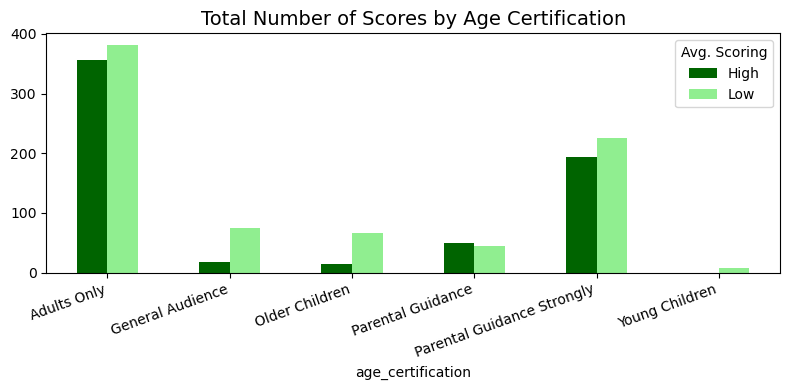

In [1]:
#Create the small dataframe and plot

import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'age_certification': ['Adults Only', 'Adults Only', 'General Audience', 'General Audience', 
                          'Older Children', 'Older Children', 'Parental Guidance', 'Parental Guidance', 
                          'Parental Guidance Strongly', 'Parental Guidance Strongly', 'Young Children'],
    'ScoringBin': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'Low'],
    'Score': [357, 382, 17, 74, 14, 67, 49, 44, 194, 225, 7]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Pivot the DataFrame to get 'age_certification' as the index and 'ScoringBin' as columns
df_pivot = df.pivot(index='age_certification', columns='ScoringBin', values='Score')

# Plot the horizontal stacked bar chart
#ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7))
ax = df_pivot.plot(kind='bar', figsize=(8, 4), color=['darkgreen', 'lightgreen'])

# Set custom labels and title
#ax.set_ylabel('Age Certification', fontsize=12)
#ax.set_xlabel('Avg. Score', fontsize=12)
ax.set_title('Total Number of Scores by Age Certification', fontsize=14)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')


# Change the legend title
ax.legend(title='Avg. Scoring')

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
dfagr_all.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,weighted_scoring,ScoringBin
1122,ts37143,Alone,SHOW,2015,Adults Only,51,"reality,documentation",US,9.0,8.4,5037.0,30.006756,High
1129,ts35201,Food Wars! Shokugeki no Soma,SHOW,2015,Adults Only,24,"drama,comedy,fantasy,thriller,animation",JP,5.0,8.2,10022.0,58.299602,High
1145,ts42062,Miraculous: Tales of Ladybug & Cat Noir,SHOW,2015,Older Children,21,"animation,action,family,fantasy,romance",FR,5.0,7.7,10102.0,55.180758,High
1149,ts38718,Slasher,SHOW,2016,Adults Only,46,"crime,drama,horror,thriller",CA,4.0,6.7,14321.0,68.071483,High
1150,ts42014,60 Days In,SHOW,2016,Parental Guidance Strongly,46,"documentation,reality",US,7.0,7.6,2676.0,14.413813,Medium


In [ ]:
dfplot2 = dfagr_all.groupby(['age_certification','type'])['id'].count().reset_index()

In [ ]:
dfpl2=pd.DataFrame(dfplot2)

In [ ]:
dfpl2.reset_index(inplace=True)

In [ ]:
df2_p = dfpl2.pivot(index='age_certification', columns='type',values='id')

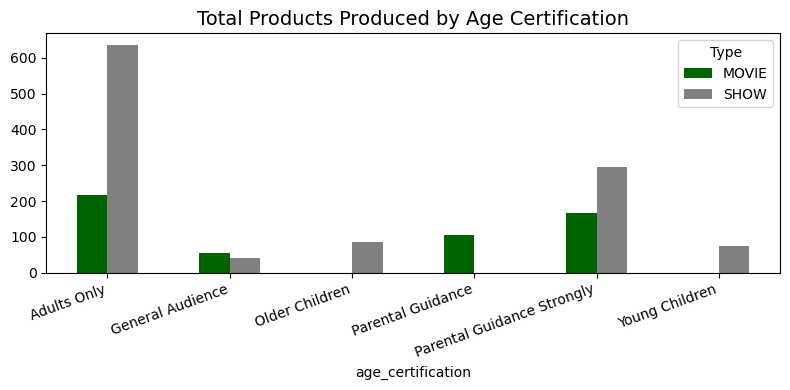

In [ ]:
ax = df2_p.plot(kind='bar', figsize=(8, 4), color=['darkgreen', 'grey'])

# Set custom labels and title
#ax.set_ylabel('Age Certification', fontsize=12)
#ax.set_xlabel('Avg. Score', fontsize=12)
ax.set_title('Total Products Produced by Age Certification', fontsize=14)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')


# Change the legend title
ax.legend(title='Type')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
dfplot3 = dfplot.groupby(['age_certification','type'])['weighted_scoring'].mean()

In [ ]:
dfpl3 = pd.DataFrame(dfplot3)


In [ ]:
dfpl3.reset_index(inplace=True)

In [ ]:
df_p = dfpl3.pivot(index = 'age_certification', columns='type', values='weighted_scoring')

In [ ]:
df_p

type,MOVIE,SHOW
age_certification,,
Adults Only,22.889687,18.179702
General Audience,6.313344,8.698234
Older Children,NaN,9.523358
Parental Guidance,16.993148,NaN
Parental Guidance Strongly,18.836938,14.927159
Young Children,NaN,0.949789


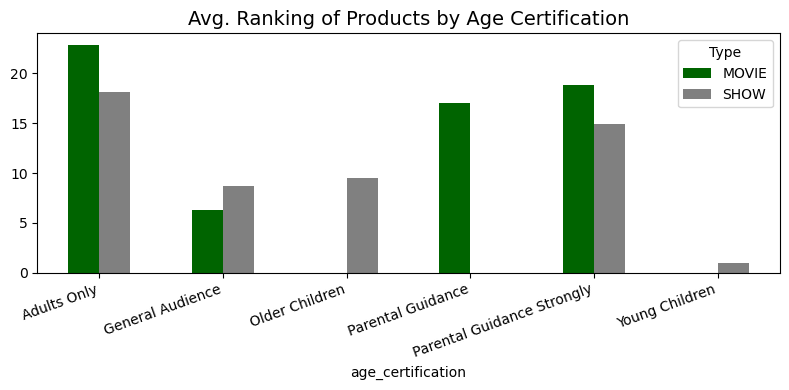

In [ ]:
ax = df_p.plot(kind='bar', figsize=(8, 4), color=['darkgreen', 'grey'])

# Set custom labels and title
#ax.set_ylabel('Age Certification', fontsize=12)
#ax.set_xlabel('Avg. Score', fontsize=12)
ax.set_title('Avg. Ranking of Products by Age Certification', fontsize=14)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, horizontalalignment='right')


# Change the legend title
ax.legend(title='Type')

# Show the plot
plt.tight_layout()
plt.show()


### CONCLUSION

Larger average rating scores occur in General Audience and Older Children in SHOWS. 
Hence maybe Netflix should consider more of these types of Products to produce. 
For MOVIES all ratings are similar in all age category restrictions.


Currently, the highest percentage of Netflix products are MOVIES and SHOWS strictly for Adults.

### What is the impact of RUNTIMES on SCORES

### Conclusion
MOVIES have larger durations from SHOWS. In a scatter plot this is very discrete.

Runtime does not seem to affect the ranking. The scatter plot does not show any tedency.
All Runtimes may have any rating

In [ ]:
 dffagr_high = dfagr_all[dfagr_all['ScoringBin'] == 'High']

In [ ]:
dfplot = dfagr_all.groupby(['ScoringBin','type'])['runtime'].mean()

In [ ]:
df_p = dfplot.reset_index().pivot(index='ScoringBin',columns='type',values='runtime')

In [ ]:
df_p

type,MOVIE,SHOW
ScoringBin,,
High,103.828194,45.030303
Low,85.798611,33.556044
Medium,96.035088,40.697406


In [ ]:
df_p = pd.DataFrame(df_p)


In [ ]:
df_p


type,MOVIE,SHOW
ScoringBin,,
High,103.828194,45.030303
Low,85.798611,33.556044
Medium,96.035088,40.697406


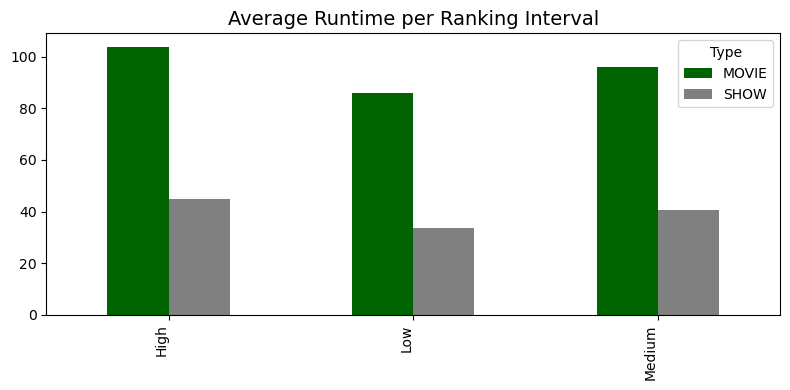

In [ ]:
ax = df_p.plot(kind='bar', figsize=(8, 4), color=['darkgreen', 'grey'])

# Set custom labels and title
#ax.set_ylabel('Age Certification', fontsize=12)
ax.set_xlabel('Avg. Score', fontsize=12, visible = False)
ax.set_title('Average Runtime per Ranking Interval', fontsize=14)
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(),horizontalalignment='right')


# Change the legend title
ax.legend(title='Type')

# Show the plot
plt.tight_layout()
plt.show()

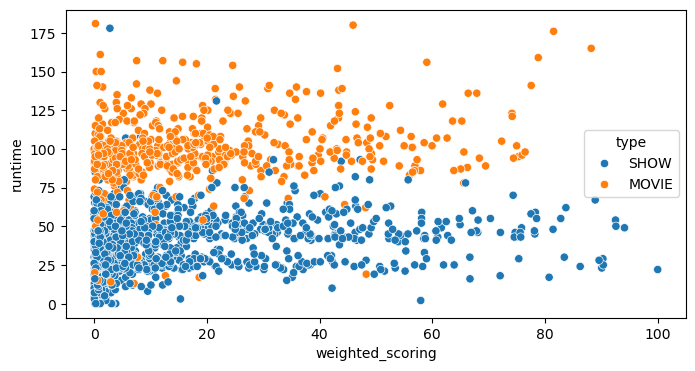

In [ ]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'weighted_scoring', y = 'runtime', data = dfagr_all, hue = 'type' )
plt.show()

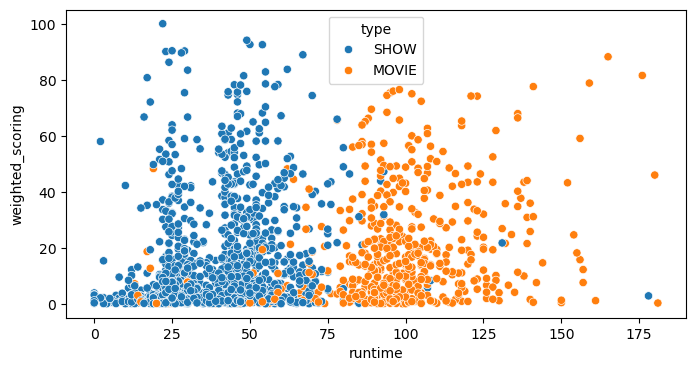

In [ ]:
plt.figure(figsize = (8,4))
sns.scatterplot(x = 'runtime', y = 'weighted_scoring', data = dfagr_all, hue = 'type' )
plt.show()

### Seasons

Seasonality of Netflix Products

### Conclusion

Most shows in Netflix have 1 Season. Most high ranked titles have 1 Season
Best avg rankings appear for SHOWS with 7 seasons. 
It does not make any difference if the seasons are between (4,5,6) - (8,9). The rating is very similar among the seasons in parentheses. So Netflix can be directed to lower cost with 4 seasons instead of 5 or 6 and 8 instead of 9. 




2-5 Seasons Have very similar average scorings. So Netflix can save money by creating shows with less seasons.
7 - 11 Seasons. Not so many products available to deduct any safe conclusions


In [ ]:
dfagr_show = dfagr_all[dfagr_all['type']=='SHOW']

In [ ]:
dfagr_show.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,weighted_scoring,ScoringBin
1122,ts37143,Alone,SHOW,2015,Adults Only,51,"reality,documentation",US,9.0,8.4,5037.0,30.006756,High
1129,ts35201,Food Wars! Shokugeki no Soma,SHOW,2015,Adults Only,24,"drama,comedy,fantasy,thriller,animation",JP,5.0,8.2,10022.0,58.299602,High
1145,ts42062,Miraculous: Tales of Ladybug & Cat Noir,SHOW,2015,Older Children,21,"animation,action,family,fantasy,romance",FR,5.0,7.7,10102.0,55.180758,High
1149,ts38718,Slasher,SHOW,2016,Adults Only,46,"crime,drama,horror,thriller",CA,4.0,6.7,14321.0,68.071483,High
1150,ts42014,60 Days In,SHOW,2016,Parental Guidance Strongly,46,"documentation,reality",US,7.0,7.6,2676.0,14.413813,Medium


In [ ]:
dfagr_show['seasons'].value_counts()

1.0     724
2.0     240
3.0      89
4.0      39
5.0      25
6.0       8
7.0       3
8.0       2
9.0       1
11.0      1
Name: seasons, dtype: int64

In [ ]:
pct = dfagr_show['seasons'].value_counts()/dfagr_show['seasons'].value_counts().sum() *100

In [ ]:
pct

1.0     63.957597
2.0     21.201413
3.0      7.862191
4.0      3.445230
5.0      2.208481
6.0      0.706714
7.0      0.265018
8.0      0.176678
9.0      0.088339
11.0     0.088339
Name: seasons, dtype: float64

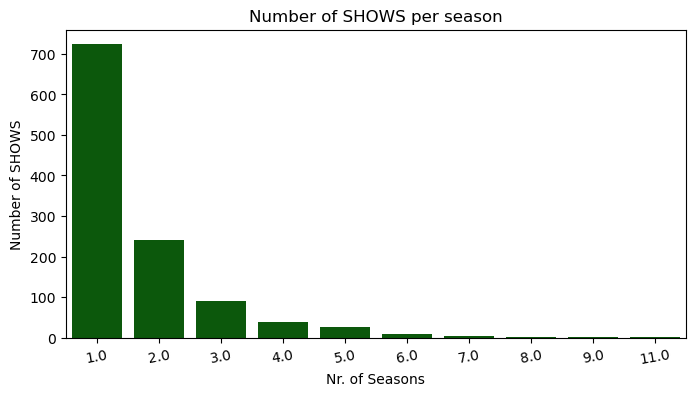

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(dfagr_show, x = 'seasons', color='darkgreen')
plt.title("Number of SHOWS per season")
plt.xlabel("Nr. of Seasons")
plt.ylabel("Number of SHOWS")
plt.xticks(rotation = 10)
plt.show()
None

Which seasons have the most high ranked IDs

In [ ]:
data = dfagr_all[dfagr_all['type']=='SHOW'].groupby('seasons')[['weighted_scoring']].mean().reset_index()
data

,seasons,weighted_scoring
0,1.0,13.426075
1,2.0,15.873362
2,3.0,20.727614
3,4.0,19.990791
4,5.0,24.341666
5,6.0,25.205457
6,7.0,53.637681
7,8.0,26.991980
8,9.0,30.006756
9,11.0,4.577711


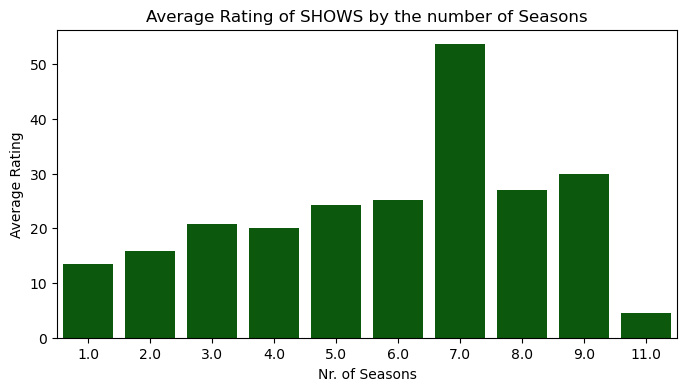

In [ ]:
#Scoring of SHOWS with regard to the number of seasons it has.
plt.figure(figsize=(8,4))
sns.barplot(data, x = 'seasons', y='weighted_scoring',color='darkgreen')
plt.title("Average Rating of SHOWS by the number of Seasons")
plt.xlabel("Nr. of Seasons")
plt.ylabel("Average Rating")
#plt.xticks(rotation = 10)
plt.show()
None

Find titles with 7 Seasons and the highest ratings.

In [ ]:
dfagr_all[dfagr_all['seasons'] == 7][['title','release_year','genres','production_countries','weighted_scoring']]

,title,release_year,genres,production_countries,weighted_scoring
1150,60 Days In,2016,"documentation,reality",US,14.413813
1185,Good Witch,2015,"scifi,fantasy,comedy,drama",US,53.916047
1238,Chef's Table,2015,documentation,US,92.583183


In [ ]:
dfnew.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'weighted_scoring', 'ScoringBin'],
      dtype='object')

In [ ]:
dfagr_all[dfagr_all['seasons'] == 7][['title','weighted_scoring','genres','production_countries']].sort_values('weighted_scoring',ascending = False)

,title,weighted_scoring,genres,production_countries
1238,Chef's Table,92.583183,documentation,US
1185,Good Witch,53.916047,"scifi,fantasy,comedy,drama",US
1150,60 Days In,14.413813,"documentation,reality",US


### FILMS / SHOWS that have largest weighted scores from 2020 - 2022

In [ ]:
#Top 3 movies with the max scoring
dftop5movies = dfagr_all[(dfagr_all['type'] == 'MOVIE')&(dfagr_all['release_year'] >= 2020)].sort_values('weighted_scoring',ascending = False)[['id','title','production_countries','weighted_scoring','genres',]].head(5)

In [ ]:
dftop5movies

,id,title,production_countries,weighted_scoring,genres
3804,tm844250,Ala Vaikunthapurramuloo,IN,88.197429,"action,drama,comedy"
3884,tm464888,Love Aaj Kal,IN,77.551704,"romance,comedy,drama"
3335,tm827508,The Boys in the Band,US,74.178669,drama
3540,tm935895,The Life Ahead,"IT,US",68.359098,"drama,european"
4824,tm471968,Passing,"US,CA,GB",65.608625,"drama,thriller"


In [ ]:
dftop5shows = dfagr_all[(dfagr_all['type'] == 'SHOW') & (dfagr_all['release_year'] >= 2020)].sort_values('weighted_scoring',ascending = False)[['id','title','production_countries','weighted_scoring','genres']].head(5)

In [ ]:
dftop5shows

,id,title,production_countries,weighted_scoring,genres
3370,ts255926,Dash & Lily,US,90.342867,"drama,comedy,romance"
4788,ts311985,Inside Job,US,89.595338,"comedy,animation,fantasy,scifi"
3396,ts223759,Killer Inside: The Mind of Aaron Hernandez,US,88.906992,"documentation,crime,sport"
4850,ts225645,The Chair,US,83.422653,"drama,comedy"
3347,ts106536,White Lines,GB,78.515955,"drama,thriller,crime"


### Creation of the final dataset. Merging with credits and keeping columns to see actors and directors
and best films - Genres - and Production Countries

In [ ]:
#credits is larger, so it is on the left.
#all values with 'genres' = NULL means that products were not present in the titles dataframe. So, we can remove them. They are not 
#going to have a score. dfagrcombouse is created in line 252 with all fields.
dfcombo = pd.merge(left = dfcredits, right = dfagrcombouse, on= 'id', how='left')

In [ ]:
#Drop nulls in genres, since this means that these movies are not part of our 
#initial information dataset. These values are only general information
dfcombo.dropna(subset =['genres'], inplace = True)

In [ ]:
dfcombo.shape

(39783, 17)

In [ ]:
#Take only the yeas 2020, 2021 and 2022 for teh 3 x 3 expamples
dfcombo3 = dfcombo[dfcombo['release_year']>=2020]

In [ ]:
dfcombo3['release_year'].unique()

array([2020., 2022., 2021.])

In [ ]:
dfcombo3.shape

(16373, 17)

Director and actor analysis: Analyze the average 'weighted_scoring' for different 'directors' and 'actors' to identify influential individuals in the industry.

In [ ]:
#Reset the index to start from 1.Dataframe with all genres we are looking at, with all actors.
dfcombo3.reset_index(inplace = True, drop=True)


Write the dfcombo3 to disc and load it each time for analysis so as not to stay in memory, since it utilizes a big percentage of this resourcce 

In [ ]:
with open("pickle_combo3_Netflix", 'wb') as file:
    pickle.dump(dfcombo3,file)
file.close()


In [ ]:
#the code to read the dfcombo3 after shutdown
with open(r"pickle_combo3_Netflix", 'rb') as file:
    dfcombo = pickle.load(file)
file.close()


In [ ]:
dfcombo.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'weighted_scoring', 'ScoringBin'],
      dtype='object')

In [ ]:
#divide for SHOWS and MOVIES

In [ ]:
dfcombo_show = dfcombo3[dfcombo3['type'] == 'SHOW']
dfcombo_movie = dfcombo3[dfcombo3['type'] == 'MOVIE']

In [ ]:
dfcombo_movie.tail()

,person_id,id,name,character,role,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,weighted_scoring,ScoringBin
16368,736339,tm1059008,Adelaida Buscato,María Paz,ACTOR,Lokillo,MOVIE,2021.0,NaN,90.0,comedy,CO,NaN,3.8,68.0,0.164919,Low
16369,399499,tm1059008,Luz Stella Luengas,Karen Bayona,ACTOR,Lokillo,MOVIE,2021.0,NaN,90.0,comedy,CO,NaN,3.8,68.0,0.164919,Low
16370,373198,tm1059008,Inés Prieto,Fanny,ACTOR,Lokillo,MOVIE,2021.0,NaN,90.0,comedy,CO,NaN,3.8,68.0,0.164919,Low
16371,378132,tm1059008,Isabel Gaona,Cacica,ACTOR,Lokillo,MOVIE,2021.0,NaN,90.0,comedy,CO,NaN,3.8,68.0,0.164919,Low
16372,1950416,tm1059008,Julian Gaviria,NaN,DIRECTOR,Lokillo,MOVIE,2021.0,NaN,90.0,comedy,CO,NaN,3.8,68.0,0.164919,Low


In [ ]:
#Actors that have participated in MOVIES with a max ranking average

In [ ]:
df_actors = dfcombo_movie.groupby('person_id')[['weighted_scoring']].mean('weighted_scoring').sort_values('weighted_scoring',ascending = False).reset_index().head()

In [ ]:
dfcombo_movie.columns

Index(['person_id', 'id', 'name', 'character', 'role', 'title', 'type',
       'release_year', 'age_certification', 'runtime', 'genres',
       'production_countries', 'seasons', 'imdb_score', 'imdb_votes',
       'weighted_scoring', 'ScoringBin'],
      dtype='object')

In [ ]:
df_actors.reset_index(drop=True,inplace=True)

In [ ]:
df_actors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   person_id         5 non-null      int64  
 1   weighted_scoring  5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 208.0 bytes


In [ ]:
df_actors['name'] = [dfcombo_movie.loc[dfcombo_movie[id],dfcombo_movie['name']] for id in df_actors['person_id']]

KeyError: 194230

In [ ]:
for id in df_actors['person_id']:
    df_actors['name'] = dfcombo_movies['name']

pandas.core.frame.DataFrame

In [ ]:
#  Actors participating in the TOP 5 max scoring MOVIES
#Get teh list of the tjopo 5 ids

lsttop5movies = dftop5movies['id']
lsttop5shows = dftop5shows['id']


In [ ]:
lsttop5movies

3804    tm844250
3884    tm464888
3335    tm827508
3540    tm935895
4824    tm471968
Name: id, dtype: object

In [ ]:
dfcombo_movie[dfcombo_movie['id'] =='tm844250']['name'].head()

3326       Allu Arjun
3327      Pooja Hegde
3328    Murali Sharma
3329          Jayaram
3330         Sushanth
Name: name, dtype: object

In [ ]:
d={}
for movie in lsttop5movies:
    actorlist = []
    actorlist.append(dfcombo_movie[dfcombo_movie['id'] == movie]['name'])
    d[movie] = actorlist


In [ ]:
for x in lsttop5movies:
    print(f'For movie {x}, the actors are {d[x]}')

For movie tm844250, the actors are [3326             Allu Arjun
3327            Pooja Hegde
3328          Murali Sharma
3329                Jayaram
3330               Sushanth
3331       Nivetha Pethuraj
3332          Samuthirakani
3333                   Tabu
3334                Navdeep
3335            Sunil Varma
3336        Rajendra Prasad
3337      Rahul Ramakrishna
3338               Brahmaji
3339          Harshavardhan
3340        Sachin Khedekar
3341        Vennela Kishore
3342           Brahmanandam
3343                   Ajay
3344      Tanikella Bharani
3345                 Rohini
3346     Govind Padmasoorya
3347        Chammak Chandra
3348    Vaishnavi Chaitanya
3349                 Tarzan
3350              Pammi Sai
3351            Ananth Babu
3352      Kalyani Natarajan
3353                Sirisha
3354             Hyper Adhi
3355            Easwari Rao
3356     Trivikram Srinivas
Name: name, dtype: object]
For movie tm464888, the actors are [3729               Saif Ali Khan


In [ ]:
#Top movies Actors
dfcombo_movies['name'].apply(lambda x: dfcombo_movies(x), 

In [ ]:
##list of actors for movies in the above list
{k:v for k,v in lsttop5movies:dfcombo_movie['name']}

In [ ]:
dfcombo_movie[dfcombo_movie['role'] == 'ACTOR'].sort_values('weighted_scoring',ascending = False)[['name','title','production_countries','weighted_scoring','genres']].head(3)

In [ ]:
dfagr_all[dfagr_all['type'] == 'SHOW'].sort_values('weighted_scoring',ascending = False)[['title','production_countries','weighted_scoring','genres']].head(3)